## Import

## import

In [1]:
seed = 42

# Import libraries
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split

import random
random.seed(seed)
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np

from PIL import Image

from skimage.transform import resize

from tensorflow.keras.initializers import he_normal, glorot_uniform, glorot_normal
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical

import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

devices = tf.config.experimental.list_physical_devices()
print("Dispositivi visibili a TensorFlow:")
for device in devices:
    print(device)
from tensorflow.keras.layers import GlobalAveragePooling2D,BatchNormalization
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Reshape, Flatten, Dropout, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.initializers import HeNormal, GlorotUniform, Zeros
from tensorflow.keras.losses import MeanSquaredError
import numpy as np

from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import BinaryCrossentropy


import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.stats import ttest_ind

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
#import pymrmr
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import os
rd=0
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from scipy.stats import pearsonr


Dispositivi visibili a TensorFlow:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


## parametri

In [274]:
alpha_values = np.linspace(0, 0.006, 30).tolist()
alpha=0.003

thresholds=np.arange(0.001, 0.501, 0.001) 

#selectors=['p_value', 'mrmr','rf', 'logistic', 'lasso']
selectors=['p_value', 'mrmr','rf', 'logistic']
classifiers=['XgBoost', 'MLP', 'SVM', 'ensemble','RandomForest', 'Logistic']
#classifiers=['RandomForest', 'XgBoost', 'MLP', 'SVM']



## Dati normali

In [128]:

# Carica il file CSV
file_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/data_rad_clin_DEF.csv"
#file_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\data_rad_clin_DEF.csv"
data = pd.read_csv(file_path)

# Lista degli ID da escludere
ids_to_exclude = ["patient_TC_19", "patient_TC_40", "patient_TC_88", "patient_TC_150", "patient_TC_193"]

# Filtra il DataFrame per escludere le righe con gli ID specificati
filtered_data = data[~data['IDs_new'].isin(ids_to_exclude)]

# Estrae i valori dalla colonna 'label' del DataFrame filtrato
labels_column = filtered_data['label']

# Converte i valori della colonna 'label' in numeri interi
labels = labels_column.astype(int).tolist()

Y_train=np.array(labels)

df = pd.read_csv('/Users/alessiamenozzi/Desktop/tabella_risultati.csv')
print(df.columns)
# Supponiamo che i numeri dei pazienti siano nella prima colonna
df.columns = ['numero_paziente'] + [f'feature_{i}' for i in range(1, 1537)]

# Ordina i dati in base ai numeri dei pazienti
df_sorted = df.sort_values(by='numero_paziente')

# Estrai le feature in un array
features_array = df_sorted.iloc[:, 1:].values
X_train = np.array(features_array)
print(X_train.shape)

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '1526', '1527', '1528', '1529', '1530', '1531', '1532', '1533', '1534',
       '1535'],
      dtype='object', length=1537)
(124, 1536)


## dati radiomica

In [275]:

file_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/data_rad_clin_DEF.csv"
#file_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\data_rad_clin_DEF.csv"
data = pd.read_csv(file_path)

# Lista degli ID da escludere
ids_to_exclude = ["patient_TC_19", "patient_TC_40", "patient_TC_88", "patient_TC_150", "patient_TC_193", "patient_TC_200", "patient_TC_17", "patient_TC_107", "patient_TC_127" ]


# Filtra il DataFrame per escludere le righe con gli ID specificati
filtered_data = data[~data['IDs_new'].isin(ids_to_exclude)]

# Estrae i valori dalla colonna 'label' del DataFrame filtrato
labels_column = filtered_data['label']

# Converte i valori della colonna 'label' in numeri interi
labels = labels_column.astype(int).tolist()

Y_train=np.array(labels)
print("Labels:", Y_train)
print("Number of labels:", len(Y_train))

file_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/features_radiomiche.csv" # Sostituisci con il percorso corretto
df = pd.read_csv(file_path, sep=';')

# Verifica i nomi delle colonne

# Estrai i valori dalla colonna 'Paziente'
labels = df['Paziente'].astype(int)

# Rimuovi la colonna 'Paziente' per ottenere solo le feature
df_features = df.drop(columns=['Paziente'])

# Converti le features in un array numpy
x_train = df_features.to_numpy()

print(x_train)
print(x_train.shape)  # (120, num_features)

Labels: [0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 1 1]
Number of labels: 120
[[-7.82822844e+02 -1.02400000e+03  3.07100000e+03 ...  2.69972505e+03
   2.80963106e-02  1.00514866e+01]
 [-9.66090232e+02 -3.02400000e+03  3.07100000e+03 ...  5.06730171e+03
   4.13964322e-02  9.21642811e+00]
 [-8.96630635e+02 -3.02400000e+03  3.07100000e+03 ...  3.95715175e+03
   1.13273940e-02  2.75076797e+01]
 ...
 [-9.39521199e+02 -3.02400000e+03  3.07100000e+03 ...  2.38010395e+03
   3.21141803e-02  3.22969245e+00]
 [-6.02441998e+02 -1.02400000e+03  3.07100000e+03 ...  1.36263582e+02
   6.99679621e-02  4.97074683e-01]
 [-5.15162265e+02 -1.02400000e+03  3.07100000e+03 ...  4.02397749e+03
   7.17804108e-02  4.97083572e+00]]
(120, 112)


In [276]:
y_train1, y_test, x_train1, X_test= train_test_split(Y_train, x_train, test_size=0.2, shuffle=False, random_state=1)
y_train, y_val, X_train, X_val= train_test_split(y_train1, x_train1, test_size=0.3, shuffle=True, stratify=y_train1, random_state=2)
#y_train, y_val, X_train, X_val= train_test_split(y_train1, x_train1, test_size=0.3, shuffle=False, random_state=7)
#y_train, y_test, X_train, X_test= train_test_split(Y_train, X_train, test_size=0.2, shuffle=False, random_state=1)

## Modelli Machine Learning con ottimizzazioni NO LOOP

In [185]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.feature_selection import SelectFromModel


# Esempio con RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Esempio con LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Esempio con Support Vector Classifier (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


# Predizioni
y_pred_rf = rf_model.predict(X_val)
y_pred_lr = lr_model.predict(X_val)
y_pred_svm = svm_model.predict(X_val)

# Calcolo dell'accuratezza per ogni modello
print("RandomForest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

# Matrice di confusione e report di classificazione
print("RandomForest Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_val, y_pred_rf))

# Predizioni delle probabilità
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]
y_proba_lr = lr_model.predict_proba(X_val)[:, 1]

# ROC-AUC
print("RandomForest ROC-AUC:", roc_auc_score(y_val, y_proba_rf))
print("LogisticRegression ROC-AUC:", roc_auc_score(y_val, y_proba_lr))

# Precision-Recall Curve per RandomForest
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_rf)
pr_auc = auc(recall, precision)
print("RandomForest PR AUC:", pr_auc)

from sklearn.model_selection import cross_val_score

# Esempio di cross-validation con RandomForest
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest CV Accuracy:", cv_scores.mean())



RandomForest Accuracy: 0.41379310344827586
LogisticRegression Accuracy: 0.41379310344827586
SVM Accuracy: 0.41379310344827586
RandomForest Confusion Matrix:
 [[ 0 17]
 [ 0 12]]
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.41      1.00      0.59        12

    accuracy                           0.41        29
   macro avg       0.21      0.50      0.29        29
weighted avg       0.17      0.41      0.24        29

RandomForest ROC-AUC: 0.4313725490196078
LogisticRegression ROC-AUC: 0.5
RandomForest PR AUC: 0.21366995073891626


RandomForest CV Accuracy: 0.5241758241758242


In [196]:
X_val= X_test
y_val= y_test

from sklearn.feature_selection import SelectFromModel


# Esempio con RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Esempio con LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Esempio con Support Vector Classifier (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


# Predizioni
y_pred_rf = rf_model.predict(X_val)
y_pred_lr = lr_model.predict(X_val)
y_pred_svm = svm_model.predict(X_val)

# Calcolo dell'accuratezza per ogni modello
print("RandomForest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

# Matrice di confusione e report di classificazione
print("RandomForest Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_val, y_pred_rf))

# Predizioni delle probabilità
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]
y_proba_lr = lr_model.predict_proba(X_val)[:, 1]

# ROC-AUC
print("RandomForest ROC-AUC:", roc_auc_score(y_val, y_proba_rf))
print("LogisticRegression ROC-AUC:", roc_auc_score(y_val, y_proba_lr))

# Precision-Recall Curve per RandomForest
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_rf)
pr_auc = auc(recall, precision)
print("RandomForest PR AUC:", pr_auc)

from sklearn.model_selection import cross_val_score

# Esempio di cross-validation con RandomForest
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest CV Accuracy:", cv_scores.mean())

lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)

best_threshold = 0
best_accuracy = 0
best_metrics = {}

thresholds = np.arange(0.3, 0.6, 0.01)
for threshold in thresholds:
    y_pred_lasso_binary = (y_pred_lasso > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_lasso_binary)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_metrics['accuracy'] = accuracy
        best_metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred_lasso_binary)
        best_metrics['classification_report'] = classification_report(y_test, y_pred_lasso_binary)

print(f"Best Threshold for LassoCV: {best_threshold}")
print("LassoCV Best Accuracy:", best_metrics['accuracy'])
print("LassoCV Best Confusion Matrix:\n", best_metrics['confusion_matrix'])
print("LassoCV Best Classification Report:\n", best_metrics['classification_report'])



RandomForest Accuracy: 0.41379310344827586
LogisticRegression Accuracy: 0.41379310344827586
SVM Accuracy: 0.41379310344827586
RandomForest Confusion Matrix:
 [[ 0 17]
 [ 0 12]]
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.41      1.00      0.59        12

    accuracy                           0.41        29
   macro avg       0.21      0.50      0.29        29
weighted avg       0.17      0.41      0.24        29

RandomForest ROC-AUC: 0.4313725490196078
LogisticRegression ROC-AUC: 0.5
RandomForest PR AUC: 0.21366995073891626
RandomForest CV Accuracy: 0.5241758241758242
Best Threshold for LassoCV: 0.5000000000000002
LassoCV Best Accuracy: 0.5862068965517241
LassoCV Best Confusion Matrix:
 [[17  0]
 [12  0]]
LassoCV Best Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        17
           1  

RandomForest Accuracy: 0.41379310344827586
RandomForest Confusion Matrix:
 [[ 0 17]
 [ 0 12]]
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.41      1.00      0.59        12

    accuracy                           0.41        29
   macro avg       0.21      0.50      0.29        29
weighted avg       0.17      0.41      0.24        29

RandomForest ROC-AUC: 0.5588235294117647
RandomForest PR AUC: 0.48997967496530714
LogisticRegression Accuracy: 0.5862068965517241
LogisticRegression Confusion Matrix:
 [[17  0]
 [12  0]]
LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        17
           1       0.00      0.00      0.00        12

    accuracy                           0.59        29
   macro avg       0.29      0.50      0.37        29
weighted avg       0.34      0.59      0

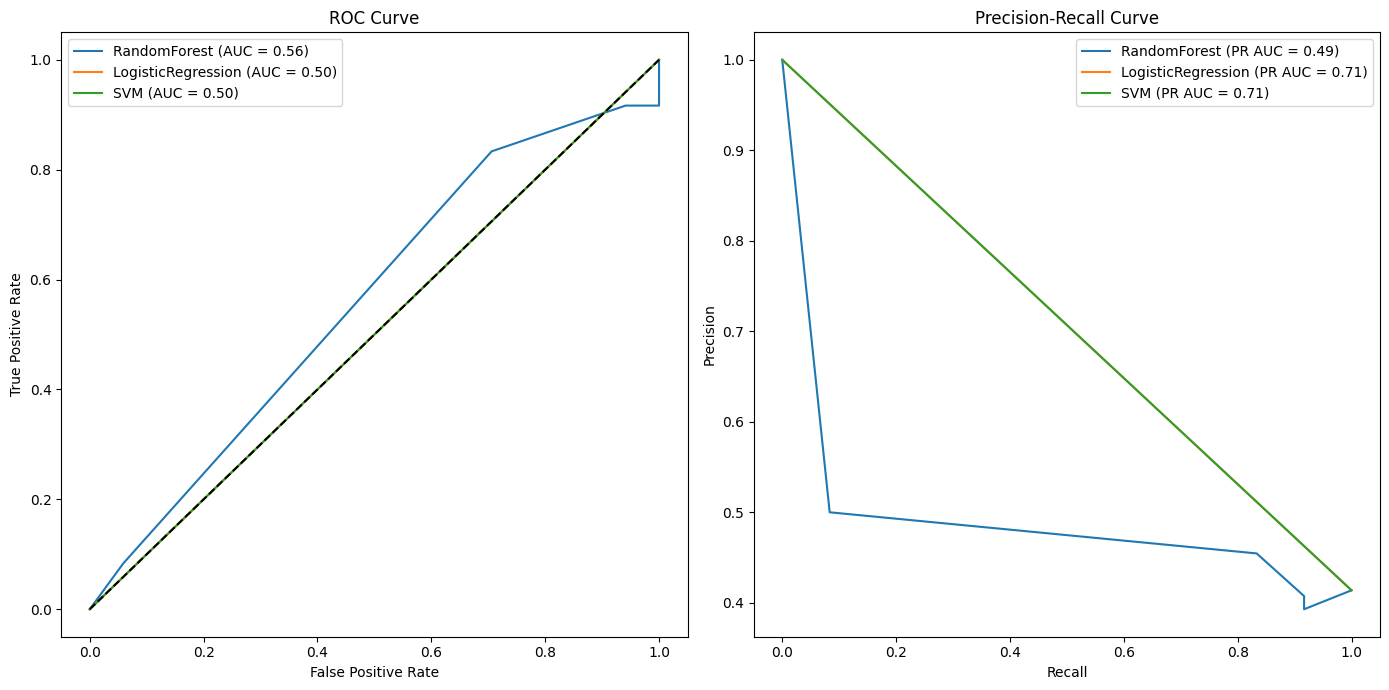

In [194]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, 
    roc_curve, precision_recall_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelli e selezione delle feature
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Esempio con RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector_rf = SelectFromModel(rf_model, threshold='mean')
X_train_rf = selector_rf.fit_transform(X_train, y_train)
X_test_rf = selector_rf.transform(X_test)
rf_model.fit(X_train_rf, y_train)

# Esempio con LogisticRegression
lr_model = LogisticRegression(random_state=42)
selector_lr = SelectFromModel(lr_model, threshold='mean')
X_train_lr = selector_lr.fit_transform(X_train, y_train)
X_test_lr = selector_lr.transform(X_test)
lr_model.fit(X_train_lr, y_train)

# Esempio con Support Vector Classifier (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
X_train_svm = X_train
X_test_svm = X_test
svm_model.fit(X_train_svm, y_train)

# Modello LassoCV
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)


# Calcolo delle metriche per RandomForest
y_pred_rf = rf_model.predict(X_test_rf)
y_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RandomForest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("RandomForest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("RandomForest PR AUC:", auc(recall_rf, precision_rf))

# Calcolo delle metriche per LogisticRegression
y_pred_lr = lr_model.predict(X_test_lr)
y_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)

print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LogisticRegression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("LogisticRegression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("LogisticRegression ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("LogisticRegression PR AUC:", auc(recall_lr, precision_lr))

# Calcolo delle metriche per SVM
y_pred_svm = svm_model.predict(X_test_svm)
y_proba_svm = svm_model.predict_proba(X_test_svm)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_proba_svm)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM ROC-AUC:", roc_auc_score(y_test, y_proba_svm))
print("SVM PR AUC:", auc(recall_svm, precision_svm))

# Calcolo delle metriche per LassoCV
# Utilizza la soglia migliore trovata in precedenza
thresholds = np.arange(0.3, 0.6, 0.01)

best_threshold = 0
best_accuracy = 0
best_metrics = {}

for threshold in thresholds:
    y_pred_lasso_binary = (y_pred_lasso > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_lasso_binary)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold
        best_metrics['accuracy'] = accuracy
        best_metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred_lasso_binary)
        best_metrics['classification_report'] = classification_report(y_test, y_pred_lasso_binary)

print(f"Best Threshold for LassoCV: {best_threshold}")
print("LassoCV Best Accuracy:", best_metrics['accuracy'])
print("LassoCV Best Confusion Matrix:\n", best_metrics['confusion_matrix'])
print("LassoCV Best Classification Report:\n", best_metrics['classification_report'])

# Plot delle curve ROC e Precision-Recall
plt.figure(figsize=(14, 7))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'LogisticRegression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_proba_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, label=f'RandomForest (PR AUC = {auc(recall_rf, precision_rf):.2f})')
plt.plot(recall_lr, precision_lr, label=f'LogisticRegression (PR AUC = {auc(recall_lr, precision_lr):.2f})')
plt.plot(recall_svm, precision_svm, label=f'SVM (PR AUC = {auc(recall_svm, precision_svm):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


Voting Classifier Accuracy: 0.41379310344827586
Voting Classifier Confusion Matrix:
 [[ 0 17]
 [ 0 12]]
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.41      1.00      0.59        12

    accuracy                           0.41        29
   macro avg       0.21      0.50      0.29        29
weighted avg       0.17      0.41      0.24        29

Voting Classifier ROC-AUC: 0.4313725490196078
Voting Classifier PR AUC: 0.21366995073891626


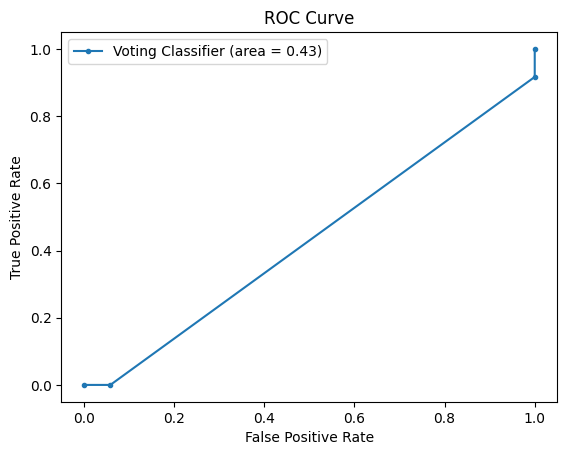

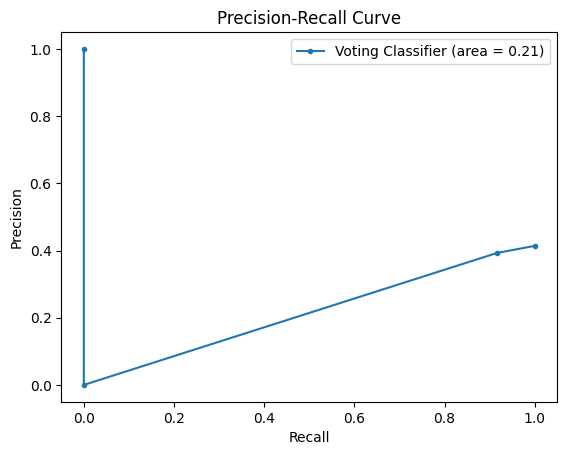

In [192]:
from sklearn.ensemble import VotingClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('svm', svm_model),
    ('mlp', mlp_model)
    
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]


# Matrice di confusione
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

# Report di classificazione
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_voting)
print("Voting Classifier ROC-AUC:", roc_auc)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba_voting)
pr_auc = auc(recall, precision)
print("Voting Classifier PR AUC:", pr_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_voting)
plt.figure()
plt.plot(fpr, tpr, marker='.', label='Voting Classifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, marker='.', label='Voting Classifier (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


## test e val

In [175]:
# Preprocessing dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [176]:
# Calcolo delle metriche per i modelli su validation set
def evaluate_model(model, X_val, y_val, is_classification=True):
    if is_classification:
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        metrics = {
            'accuracy': accuracy_score(y_val, y_pred),
            'confusion_matrix': confusion_matrix(y_val, y_pred),
            'classification_report': classification_report(y_val, y_pred),
            'roc_auc': roc_auc_score(y_val, y_proba),
            'pr_auc': auc(recall, precision),
            'f1_score': f1_score(y_val, y_pred)
        }
    else:
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        metrics = {
            'accuracy': accuracy_score(y_val, y_pred),
            'confusion_matrix': confusion_matrix(y_val, y_pred),
            'classification_report': classification_report(y_val, y_pred),
            'f1_score': f1_score(y_val, y_pred)
        }
    return metrics

In [177]:
# Esempio con RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector_rf = SelectFromModel(rf_model, threshold='mean')
X_train_rf = selector_rf.fit_transform(X_train, y_train)
X_val_rf = selector_rf.transform(X_val)
X_test_rf = selector_rf.transform(X_test)
rf_model.fit(X_train_rf, y_train)


# Esempio con LogisticRegression
lr_model = LogisticRegression(random_state=42)
selector_lr = SelectFromModel(lr_model, threshold='mean')
X_train_lr = selector_lr.fit_transform(X_train, y_train)
X_val_lr = selector_lr.transform(X_val)
X_test_lr = selector_lr.transform(X_test)
lr_model.fit(X_train_lr, y_train)

# Esempio con Support Vector Classifier (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
X_train_svm = X_train
X_val_svm = X_val
X_test_svm = X_test
svm_model.fit(X_train_svm, y_train)


# Esempio con MLPClassifier
rf_model_1= RandomForestClassifier(n_estimators=100, random_state=42)
mlp_model = MLPClassifier(random_state=42)
selector_mlp = SelectFromModel(rf_model_1, threshold='mean')
X_train_mlp = selector_mlp.fit_transform(X_train, y_train)
X_val_mlp = selector_mlp.transform(X_val)
X_test_mlp = selector_mlp.transform(X_test)
mlp_model.fit(X_train_mlp, y_train)

## Esemble
rf_m = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_m = MLPClassifier(random_state=42)
lr_m = LogisticRegression(random_state=42)
svm_m = SVC(kernel='rbf', probability=True, random_state=42)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_m),
    ('lr', lr_m),
    ('svm', svm_m),
    ('mlp', mlp_m)
    
], voting='soft')
selector_ens = SelectFromModel(rf_m, threshold='mean')

X_train_en = selector_ens.fit_transform(X_train, y_train)
X_val_en = selector_ens.transform(X_val)
X_test_en = selector_ens.transform(X_test)
voting_clf.fit(X_train_en, y_train)




VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [178]:
# Valuta i modelli
metrics_rf = evaluate_model(rf_model, X_val_rf, y_val)
metrics_lr = evaluate_model(lr_model, X_val_lr, y_val)
metrics_svm = evaluate_model(svm_model, X_val_svm, y_val)
metrics_mlp = evaluate_model(mlp_model, X_val_mlp, y_val)
metrics_ensemble = evaluate_model(voting_clf, X_val_en, y_val)
metrics_lasso = evaluate_model(LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42).fit(X_train, y_train), X_val, y_val, is_classification=False)

print(metrics_ensemble)
print(metrics_rf)
print(metrics_svm)
print(metrics_lr)

# Trova il miglior modello basato su F1-score
models_metrics = {
    'RandomForest': metrics_rf,
    'LogisticRegression': metrics_lr,
    'SVM': metrics_svm,
    'MLP': metrics_mlp,
    'LassoCV': metrics_lasso,
    'esemble': metrics_ensemble
}

best_model_name = max(models_metrics, key=lambda x: models_metrics[x].get('f1_score', 0))
best_model_metrics = models_metrics[best_model_name]
print(f"Best Model: {best_model_name} with F1-score: {best_model_metrics['f1_score']}")


# Applica il modello migliore al test set
if best_model_name != 'LassoCV':
    best_model = {
        'RandomForest': rf_model,
        'LogisticRegression': lr_model,
        'SVM': svm_model,
        'MLP': mlp_model,
        'esemble': voting_clf
    }[best_model_name]
    y_pred_best = best_model.predict(X_test)
    y_proba_best = best_model.predict_proba(X_test)[:, 1]
    print(f"Best Model ({best_model_name}) Accuracy on Test Set:", accuracy_score(y_test, y_pred_best))
    print(f"Best Model ({best_model_name}) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
    print(f"Best Model ({best_model_name}) Classification Report:\n", classification_report(y_test, y_pred_best))
    print(f"Best Model ({best_model_name}) ROC-AUC:", roc_auc_score(y_test, y_proba_best))
    precision_best, recall_best, _ = precision_recall_curve(y_test, y_proba_best)
    print(f"Best Model ({best_model_name}) PR AUC:", auc(recall_best, precision_best))
else:
    print("LassoCV does not support probability-based metrics such as ROC-AUC and PR AUC")

# Valutazione dell'Ensemble Voting Classifier sul test set
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]
print(" Best Classifier Accuracy on Test Set:", accuracy_score(y_test, y_pred_voting))
print(" Best Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("VotingClassifier Classification Report:\n", classification_report(y_test, y_pred_voting))
print("VotingClassifier ROC-AUC:", roc_auc_score(y_test, y_proba_voting))
precision_voting, recall_voting, _ = precision_recall_curve(y_test, y_proba_voting)
print("VotingClassifier PR AUC:", auc(recall_voting, precision_voting))

{'accuracy': 0.3448275862068966, 'confusion_matrix': array([[ 6,  9],
       [10,  4]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.38      0.40      0.39        15\n           1       0.31      0.29      0.30        14\n\n    accuracy                           0.34        29\n   macro avg       0.34      0.34      0.34        29\nweighted avg       0.34      0.34      0.34        29\n', 'roc_auc': 0.41904761904761906, 'pr_auc': 0.47320406800088255, 'f1_score': 0.2962962962962963}
{'accuracy': 0.4827586206896552, 'confusion_matrix': array([[8, 7],
       [8, 6]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.50      0.53      0.52        15\n           1       0.46      0.43      0.44        14\n\n    accuracy                           0.48        29\n   macro avg       0.48      0.48      0.48        29\nweighted avg       0.48      0.48      0.48        29\n', 'roc_

ValueError: X has 112 features, but RandomForestClassifier is expecting 44 features as input.

In [ ]:
# Plot delle curve ROC e Precision-Recall
plt.figure(figsize=(14, 7))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {roc_auc_score(y_val, rf_model.predict_proba(X_val_rf)[:, 1]):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'LogisticRegression (AUC = {roc_auc_score(y_val, lr_model.predict_proba(X_val_lr)[:, 1]):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_val, svm_model.predict_proba(X_val_svm)[:, 1]):.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_score(y_val, mlp_model.predict_proba(X_val_mlp)[:, 1]):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, label=f'RandomForest (PR AUC = {auc(recall_rf, precision_rf):.2f})')
plt.plot(recall_lr, precision_lr, label=f'LogisticRegression (PR AUC = {auc(recall_lr, precision_lr):.2f})')
plt.plot(recall_svm, precision_svm, label=f'SVM (PR AUC = {auc(recall_svm, precision_svm):.2f})')
plt.plot(recall_mlp, precision_mlp, label=f'MLP (PR AUC = {auc(recall_mlp, precision_mlp):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Feature correlation e p_value

In [277]:

X_train_reduced, dropped_features = remove_highly_correlated_features(X_train, 0.9)

# Riduci X_val e X_test usando le feature rimosse
X_val_reduced = np.delete(X_val, dropped_features, axis=1)
X_test_reduced = np.delete(X_test, dropped_features, axis=1)

print(X_train_reduced.shape)

print(X_test_reduced.shape)
print(X_val_reduced.shape)



# Rimozione delle feature con p-value elevato
#X_train_reduced, features_to_keep = remove_high_pvalue_features(X_train_reduced, y_train, alpha=0.05)
#print(features_to_keep)
#X_val_reduced = X_val_reduced[:, features_to_keep]
#X_test_reduced = X_test_reduced[:, features_to_keep]


print(X_train_reduced.shape)

print(X_test_reduced.shape)
print(X_val_reduced.shape)

(67, 42)
(24, 42)
(29, 42)
(67, 42)
(24, 42)
(29, 42)


## funzioni

In [201]:

def compute_correlation(X, threshold=0.85):
    corr_matrix = np.corrcoef(X, rowvar=False)
    upper_triangle = np.triu(corr_matrix, k=1)
    to_drop = [column for column in range(upper_triangle.shape[0]) if any(abs(upper_triangle[column, :]) > threshold)]
    return to_drop


def remove_highly_correlated_features(X, threshold=0.85):
    corr_matrix = np.corrcoef(X, rowvar=False)
    upper_triangle = np.triu(corr_matrix, k=1)
    to_drop = [column for column in range(upper_triangle.shape[0]) if any(abs(upper_triangle[column, :]) > threshold)]
    X_reduced = np.delete(X, to_drop, axis=1)
    return X_reduced, to_drop


def remove_high_pvalue_features(X, y, alpha=0.05):
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit(X, y)
    p_values = selector.pvalues_
    features_to_keep = np.where(p_values < alpha)[0]
    X_reduced = X[:, features_to_keep]
    return X_reduced, features_to_keep

In [202]:
## FEATURE SELECTION LASSO
def select_features_with_lasso(X, y, alpha=0.001):
    
    # Fit Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)

    # Get coefficients
    coefficients = lasso.coef_

    # Select features with non-zero coefficients
    selected_features = np.where(coefficients != 0)[0]

    # Create new feature matrix with only selected features
    X_selected = X[:, selected_features]

    return X_selected, selected_features

## FEATURE SELECTION LOGISTIC
def logistic_regression_feature_selection(X, y, num_features):
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X, y)
    coef_abs = np.abs(lr.coef_)
    feature_importances = np.mean(coef_abs, axis=0)
    selected_features = feature_importances.argsort()[-num_features:][::-1]
    # Create new feature matrix with only selected features
    X_selected = X[:, selected_features]
    return X_selected, selected_features


def mrmr_feature_selection(X, y, num_features):
    # Calcolare l'informazione mutua tra ogni caratteristica e il target
    mi = mutual_info_classif(X, y)
    
    # Standardizzare le caratteristiche
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Calcolare la distanza euclidea tra le caratteristiche
    distances = squareform(pdist(X_scaled.T, 'euclidean'))
    
    selected_features = []
    selected_indices = []
    
    # Selezionare la prima caratteristica con la massima informazione mutua
    first_feature_index = np.argmax(mi)
    selected_features.append(first_feature_index)
    selected_indices.append(first_feature_index)
    
    # Iterare per selezionare le caratteristiche rimanenti
    for _ in range(num_features - 1):
        max_relevance = -np.inf
        selected_feature_index = -1
        
        for i in range(X.shape[1]):
            if i in selected_indices:
                continue
            
            relevance = mi[i]
            redundancy = np.mean(distances[i, selected_indices])
            
            mrmr_score = relevance - redundancy
            
            if mrmr_score > max_relevance:
                max_relevance = mrmr_score
                selected_feature_index = i
        
        selected_features.append(selected_feature_index)
        selected_indices.append(selected_feature_index)

    X_selected = X[:, selected_indices]
    return X_selected, selected_indices



## FEATURE SELECTION RANDOM FOREST
def rf_feature_selection(X, y, num_features):
    # Inizializza il classificatore Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # Addestra il modello
    rf.fit(X, y)
    # Ottieni l'importanza delle caratteristiche
    feature_importances = rf.feature_importances_
    # Seleziona gli indici delle caratteristiche più importanti
    selected_features = np.argsort(feature_importances)[-num_features:][::-1]
    # Crea una nuova matrice di caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_features]
    return X_selected, selected_features


def p_value_feature_selection(X, num_features):
    """
    Seleziona le prime `num_features` caratteristiche dal vettore di caratteristiche.

    Args:
    X (np.ndarray): Matrice delle caratteristiche (numero di campioni, numero di caratteristiche).
    num_features (int): Numero di caratteristiche da selezionare.

    Returns:
    np.ndarray: Nuova matrice delle caratteristiche con solo le caratteristiche selezionate.
    np.ndarray: Indici delle caratteristiche selezionate.
    """
    # Controlla se num_features è maggiore del numero totale di caratteristiche
    if num_features > X.shape[1]:
        raise ValueError(f"num_features ({num_features}) è maggiore del numero totale di caratteristiche ({X.shape[1]})")

    # Seleziona i primi num_features indici
    selected_features = np.arange(num_features)
    
    # Crea una nuova matrice di caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_features]
    
    return X_selected, selected_features

## FUNZIONE PER RIMUOVERE FEATURES SELEZIONATE
def filter_patients_features(filtered_patients, selected_features):
    """
    Removes the non-selected features from the filtered_patients array.

    Parameters:
    filtered_patients (list of numpy.ndarray): The list containing patients' images' features.
    selected_features (numpy.ndarray): The indices of the selected features.

    Returns:
    list of numpy.ndarray: The new filtered_patients array with only the selected features.
    """
    filtered_patients_selected = []

    for patient_features in filtered_patients:
        # Select only the features specified in selected_features
        patient_features_selected = patient_features[:, selected_features]
        filtered_patients_selected.append(patient_features_selected)

    return filtered_patients_selected


def select_features_by_p_value(x_train_expanded, y_train_expanded, p_value_threshold=0.01):

    p_values = []
    num_features = x_train_expanded.shape[1]

    for i in range(num_features):
        feature = x_train_expanded[:, i]
        group_0 = feature[y_train_expanded == 0]
        group_1 = feature[y_train_expanded == 1]
        t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
        p_values.append(p_val)

    # Convertire i p-value in un array numpy per ordinare più facilmente
    p_values = np.array(p_values)

    # Selezionare le caratteristiche con p-value < soglia
    selected_features_indices = np.where(p_values < p_value_threshold)[0]

    # Ordinare le caratteristiche selezionate in base ai p-value
    sorted_indices = selected_features_indices[np.argsort(p_values[selected_features_indices])]

    x_train_expanded = x_train_expanded[:, sorted_indices]

    return x_train_expanded, sorted_indices



## funzione classificazione

In [278]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, f1_score, accuracy_score, confusion_matrix

def classification_method(selector, classifier, alpha, x_train_expanded, y_train_expanded, x_test, y_test, num_features, mode="Val", selected_features=[0], thresholds=np.arange(0.3, 0.6, 0.01)):
    best_f1_score = 0
    best_case = None

    if mode == "Val":
        selected_features = None  # Inizializziamo selected_features per prevenire l'errore UnboundLocalError

        if num_features != len(x_train_expanded[0]) or alpha != 0:
            if selector == "lasso":
                X_selected, selected_features = select_features_with_lasso(x_train_expanded, y_train_expanded, alpha)
            elif selector == "logistic":
                X_selected, selected_features = logistic_regression_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "mrmr":
                X_selected, selected_features = mrmr_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "rf":
                X_selected, selected_features = rf_feature_selection(x_train_expanded, y_train_expanded, num_features)
            elif selector == "p_value":
                X_selected, selected_features = p_value_feature_selection(x_train_expanded, num_features)
            else:
                print("Wrong selector. Choose between: mrmr, rf, logistic, lasso")
                return

            x_test = x_test[:, selected_features]  # Applichiamo la selezione delle feature anche su x_test
        else:
            X_selected = x_train_expanded
            selected_features = list(range(len(x_train_expanded[0])))  # Selezioniamo tutte le feature se non si fa feature selection

        number_features = len(selected_features)  # Numero di feature selezionate

        # Addestriamo il classificatore
        classifier.fit(X_selected, y_train_expanded)


    if (mode == "Test"):
        x_test = x_test[:, selected_features]
        number_features = len(selected_features)
    
        # Prevediamo le probabilità sul set di test
    y_proba_test = classifier.predict_proba(x_test)[:, 1]


    if(isinstance(thresholds, np.ndarray)== False):
        thresholds=[thresholds]
        
    
    for threshold in thresholds:
            # Previsioni usando la soglia custom
            y_pred_custom_test = (y_proba_test >= threshold).astype(int)

            # Calcolo metriche
            accuracy = accuracy_score(y_test, y_pred_custom_test)
            f1 = f1_score(y_test, y_pred_custom_test)
            roc_auc = roc_auc_score(y_test, y_proba_test)

            # Precision-recall curve e AUC
            precision, recall, _ = precision_recall_curve(y_test, y_proba_test)
            pr_auc = auc(recall, precision)

            # Miglior precisione e richiamo (basato su soglia personalizzata)
            best_precision = precision[np.argmax(recall)]
            best_recall = recall[np.argmax(recall)]

            # Matrice di confusione
            conf = confusion_matrix(y_test, y_pred_custom_test)

            # Se il nuovo risultato è migliore rispetto al migliore attuale, aggiorniamo
            if f1 > best_f1_score or (f1 == best_f1_score and pr_auc > (best_case['pr_auc'] if best_case else 0)):
                best_f1_score = f1
                best_case = {
                    'alpha': alpha,
                    'num_features': number_features,
                    'selected_features': selected_features,
                    'pr_auc': pr_auc,
                    'best_precision': best_precision,
                    'best_recall': best_recall,
                    'roc_auc': roc_auc,
                    'f1': f1,
                    'accuracy': accuracy,
                    'confusion_matrix': conf,
                    'best_threshold': threshold
                }

    return best_case


## Loop

In [279]:
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lista per salvare i risultati
results_test = [{} for _ in range(len(classifiers))]
results_val = [{} for _ in range(len(classifiers))]

for i, classifier in enumerate(classifiers):
    print("Starting with classifier:", classifier)
    for selector in selectors:
        print("Starting with selector:", selector)
        results_test[i][selector] = {
            'classifier': classifier,
            'alpha': [],
            'num_features': [],
            'pr_auc': [],
            'best_precision': [],
            'best_recall': [],
            'roc_auc': [],
            'f1': [],
            'accuracy': [],
            'confusion_matrix': [],
            'best_threshold': [],
            'selected_features': []
        }
        results_val[i][selector] = {
            'classifier': classifier,
            'alpha': [],
            'num_features': [],
            'pr_auc': [],
            'best_precision': [],
            'best_recall': [],
            'roc_auc': [],
            'f1': [],
            'accuracy': [],
            'confusion_matrix': [],
            'best_threshold': [],
            'selected_features': []
        }

        best_f1 = 0
        best_case = None

        limit=len(X_train_reduced[0]) + 1
        for t in range(2, limit):
            # Seleziona le feature ridotte
            print("Number of features ", t)

            # Selezione del classificatore
            if classifier == 'RandomForest':
                classi = RandomForestClassifier(n_estimators=100, random_state=42)
                selector_rf = SelectFromModel(classi, threshold='mean')
                X_train_rf = selector_rf.fit_transform(X_train_reduced, y_train)
                X_test_rf = selector_rf.transform(X_test_reduced)
                X_val_rf = selector_rf.transform(X_val_reduced)
                if(t>len(X_train_rf[0])):
                   continue

            elif classifier == 'Logistic':
                classi = LogisticRegression()
                selector_lr = SelectFromModel(classi, threshold='mean')
                X_train_lr = selector_lr.fit_transform(X_train_reduced, y_train)
                X_test_lr = selector_lr.transform(X_test_reduced)
                X_val_lr = selector_lr.transform(X_val_reduced)
                if(t>len(X_train_lr[0])):
                   continue
                
            elif classifier == 'SVM':
                classi = SVC(kernel='rbf', probability=True, random_state=42)
            elif classifier == 'XgBoost':
                classi = XGBClassifier()
            elif classifier == 'MLP':
                classi = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
            elif classifier == 'ensemble':
                rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
                logistic_model = LogisticRegression(random_state=42)
                svc_model = SVC(kernel='rbf', probability=True, random_state=42)

                # Crea l'ensemble con VotingClassifier
                classi = VotingClassifier(
                    estimators=[
                        ('random_forest', rf_model),
                        ('logistic', logistic_model),
                        ('svc', svc_model)
                    ],
                    voting='soft'  # 'soft' usa le probabilità di classe, 'hard' usa le predizioni di classe
                    )

            
            if classifier == 'RandomForest':
                best_case = classification_method(selector, classi, alpha, X_train_rf, y_train, X_val_rf, y_val, num_features=t, mode="Val", selected_features=[0])
            elif classifier == 'Logistic':
                best_case = classification_method(selector, classi, alpha, X_train_lr, y_train, X_val_lr, y_val, num_features=t, mode="Val", selected_features=[0])
            else:
                best_case = classification_method(selector, classi, alpha, X_train_reduced, y_train, X_val_reduced, y_val, num_features=t, mode="Val", selected_features=[0])


            if best_case:
                results_val[i][selector]['alpha'].append(best_case['alpha'])
                results_val[i][selector]['selected_features'].append(best_case['selected_features'])
                results_val[i][selector]['num_features'].append(best_case['num_features'])
                results_val[i][selector]['pr_auc'].append(best_case['pr_auc'])
                results_val[i][selector]['best_precision'].append(best_case['best_precision'])
                results_val[i][selector]['best_recall'].append(best_case['best_recall'])
                results_val[i][selector]['roc_auc'].append(best_case['roc_auc'])
                results_val[i][selector]['f1'].append(best_case['f1'])
                results_val[i][selector]['accuracy'].append(best_case['accuracy'])
                results_val[i][selector]['confusion_matrix'].append(best_case['confusion_matrix'])
                results_val[i][selector]['best_threshold'].append(best_case['best_threshold'])

            if classifier == 'RandomForest':
                best_case = classification_method(selector, classi, alpha, X_train_rf, y_train, X_test_rf, y_test, num_features=t, mode="Val", selected_features=[0])
            elif classifier == 'Logistic':
                best_case = classification_method(selector, classi, alpha, X_train_lr, y_train, X_test_lr, y_test, num_features=t, mode="Val", selected_features=[0])
            else:
                best_case = classification_method(selector, classi, alpha, X_train_reduced, y_train, X_test_reduced, y_test, num_features=t, mode="Val", selected_features=[0])
            
            if best_case:
                results_test[i][selector]['alpha'].append(best_case['alpha'])
                results_test[i][selector]['selected_features'].append(best_case['selected_features'])
                results_test[i][selector]['num_features'].append(best_case['num_features'])
                results_test[i][selector]['pr_auc'].append(best_case['pr_auc'])
                results_test[i][selector]['best_precision'].append(best_case['best_precision'])
                results_test[i][selector]['best_recall'].append(best_case['best_recall'])
                results_test[i][selector]['roc_auc'].append(best_case['roc_auc'])
                results_test[i][selector]['f1'].append(best_case['f1'])
                results_test[i][selector]['accuracy'].append(best_case['accuracy'])
                results_test[i][selector]['confusion_matrix'].append(best_case['confusion_matrix'])
                results_test[i][selector]['best_threshold'].append(best_case['best_threshold'])




Starting with classifier: XgBoost
Starting with selector: p_value
Number of features  2
Number of features  3
Number of features  4
Number of features  5
Number of features  6
Number of features  7
Number of features  8
Number of features  9
Number of features  10
Number of features  11
Number of features  12
Number of features  13
Number of features  14
Number of features  15
Number of features  16
Number of features  17
Number of features  18
Number of features  19
Number of features  20
Number of features  21
Number of features  22
Number of features  23
Number of features  24
Number of features  25
Number of features  26
Number of features  27
Number of features  28
Number of features  29
Number of features  30
Number of features  31
Number of features  32
Number of features  33
Number of features  34
Number of features  35
Number of features  36
Number of features  37
Number of features  38
Number of features  39
Number of features  40
Number of features  41
Number of features  42

In [280]:
def get_top_n_overall_results(results, n=5, metric='f1'):
    """
    Ordina i risultati complessivi di tutti i classificatori e selettori in base alla metrica specificata
    e restituisce i migliori N risultati.
    """
    all_results = []
    for i, classifier in enumerate(classifiers):
        for selector in selectors:
            for j in range(len(results[i][selector][metric])):
                all_results.append({
                    'classifier': classifier,
                    'selector': selector,
                    'alpha': results[i][selector]['alpha'][j],
                    'selected_features': results[i][selector]['selected_features'][j],
                    'num_features': results[i][selector]['num_features'][j],
                    'pr_auc': results[i][selector]['pr_auc'][j],
                    'best_precision': results[i][selector]['best_precision'][j],
                    'best_recall': results[i][selector]['best_recall'][j],
                    'roc_auc': results[i][selector]['roc_auc'][j],
                    'f1': results[i][selector]['f1'][j],
                    'accuracy': results[i][selector]['accuracy'][j],
                    'confusion_matrix': results[i][selector]['confusion_matrix'][j],
                    'best_threshold': results[i][selector]['best_threshold'][j],
                    'index': (i, selector, j)  # Memorizza l'indice per corrispondere con il test set
                })
    
    # Ordina tutti i risultati in base alla metrica specificata
    sorted_results = sorted(all_results, key=lambda x: x[metric], reverse=True)
    
    return sorted_results[:n]  # Restituisce i migliori N risultati


# Trova i migliori 3 risultati complessivi per il validation set
top_val_results = get_top_n_overall_results(results_val, n=5, metric='f1')

best_classifier = top_val_results[0]['classifier']
best_selector = top_val_results[0]['selector']
best_selected_features = top_val_results[0]['selected_features']

print(best_classifier)
print(best_selector)


# Stampa i 3 migliori risultati di validazione e i loro rispettivi valori di test
for idx, val_case in enumerate(top_val_results):
    i, selector, j = val_case['index']  # Recupera l'indice originale del risultato
    
    print(f"\n--- Top {idx+1} Validation Result ---")
    print(f"Classifier: {val_case['classifier']}, Selector: {val_case['selector']}")
    print(f"Alpha: {val_case['alpha']}")
    print(f"Num Features: {val_case['num_features']}")
    print(f"PR AUC: {val_case['pr_auc']}")
    print(f"Best Precision: {val_case['best_precision']}")
    print(f"Best Recall: {val_case['best_recall']}")
    print(f"ROC AUC: {val_case['roc_auc']}")
    print(f"F1 Score: {val_case['f1']}")
    print(f"Accuracy: {val_case['accuracy']}")
    print(f"Confusion Matrix:\n{val_case['confusion_matrix']}")
    print(f"Best Threshold: {val_case['best_threshold']}")

    # Ora stampa i corrispondenti risultati del test set
    print(f"\n--- Corresponding Test Result ---")
    print(f"Classifier: {val_case['classifier']}, Selector: {val_case['selector']}")
    print(f"Alpha: {results_test[i][selector]['alpha'][j]}")
    print(f"Num Features: {results_test[i][selector]['num_features'][j]}")
    print(f"PR AUC: {results_test[i][selector]['pr_auc'][j]}")
    print(f"Best Precision: {results_test[i][selector]['best_precision'][j]}")
    print(f"Best Recall: {results_test[i][selector]['best_recall'][j]}")
    print(f"ROC AUC: {results_test[i][selector]['roc_auc'][j]}")
    print(f"F1 Score: {results_test[i][selector]['f1'][j]}")
    print(f"Accuracy: {results_test[i][selector]['accuracy'][j]}")
    print(f"Confusion Matrix:\n{results_test[i][selector]['confusion_matrix'][j]}")
    print(f"Best Threshold: {results_test[i][selector]['best_threshold'][j]}")


ensemble
p_value

--- Top 1 Validation Result ---
Classifier: ensemble, Selector: p_value
Alpha: 0.003
Num Features: 7
PR AUC: 0.8932643421741164
Best Precision: 0.4827586206896552
Best Recall: 1.0
ROC AUC: 0.8523809523809524
F1 Score: 0.8333333333333334
Accuracy: 0.8620689655172413
Confusion Matrix:
[[15  0]
 [ 4 10]]
Best Threshold: 0.5000000000000002

--- Corresponding Test Result ---
Classifier: ensemble, Selector: p_value
Alpha: 0.003
Num Features: 7
PR AUC: 0.7529855549199085
Best Precision: 0.3333333333333333
Best Recall: 1.0
ROC AUC: 0.703125
F1 Score: 0.7692307692307693
Accuracy: 0.875
Confusion Matrix:
[[16  0]
 [ 3  5]]
Best Threshold: 0.5300000000000002

--- Top 2 Validation Result ---
Classifier: XgBoost, Selector: p_value
Alpha: 0.003
Num Features: 13
PR AUC: 0.6725096426023536
Best Precision: 0.4827586206896552
Best Recall: 1.0
ROC AUC: 0.7428571428571429
F1 Score: 0.8125
Accuracy: 0.7931034482758621
Confusion Matrix:
[[10  5]
 [ 1 13]]
Best Threshold: 0.3

--- Correspon

Best Classifier is  ensemble
Best Selector is  p_value
Number of features selected is  7
(96, 7)
Accuracy: 0.75
Confusion Matrix:
[[13  3]
 [ 3  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.62      0.62      0.62         8

    accuracy                           0.75        24
   macro avg       0.72      0.72      0.72        24
weighted avg       0.75      0.75      0.75        24

ROC AUC: 0.7265625
PR AUC: 0.7588150062656642
F1 Score: 0.625


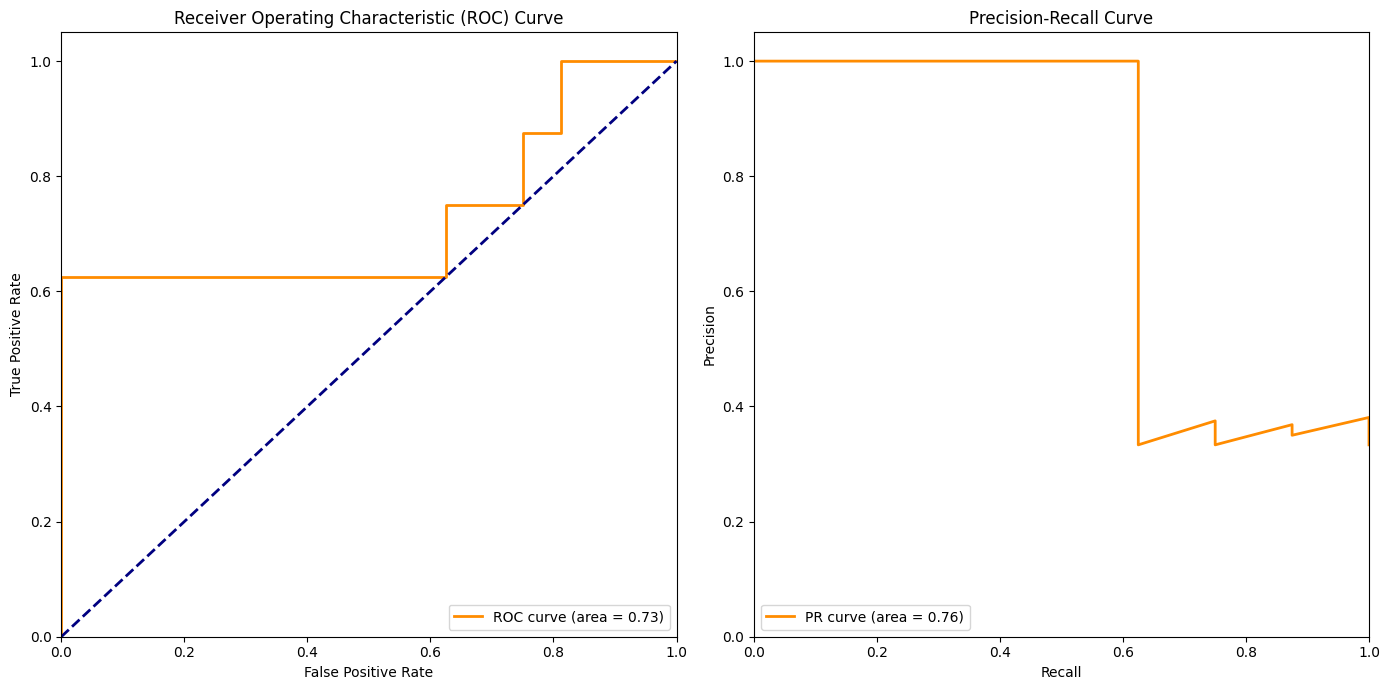

In [281]:
#patients_train, patients_test, y_train, y_test, features_train, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=False, random_state=1)

best_classifier = top_val_results[0]['classifier']
best_selector = top_val_results[0]['selector']
best_selected_features = top_val_results[0]['selected_features']

print("Best Classifier is ", top_val_results[0]['classifier'])
print("Best Selector is ", top_val_results[0]['selector'])
print("Number of features selected is ", top_val_results[0]['num_features'])


if(best_classifier=='RandomForest'):
         classi = RandomForestClassifier(n_estimators=100, random_state=42)

if(best_classifier=='Logistic'):
                             classi = LogisticRegression()
if(best_classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
if(best_classifier=='XgBoost'):
                             classi = XGBClassifier()
if(best_classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
elif (best_classifier == 'ensemble'):
                rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
                logistic_model = LogisticRegression(random_state=42)
                svc_model = SVC(kernel='rbf', probability=True, random_state=42)
                classi = VotingClassifier(
                    estimators=[
                        ('random_forest', rf_model),
                        ('logistic', logistic_model),
                        ('svc', svc_model)
                    ],
                    voting='soft'  # 'soft' usa le probabilità di classe, 'hard' usa le predizioni di classe
                    )


#x_train_expanded, y_train_expanded, _= continue_array(features_train1, y_train1)

X_train_combined = np.vstack((X_train[:, best_selected_features], X_val[:, best_selected_features]))  # Combina righe di X_train e X_val
y_train_combined = np.hstack((y_train, y_val))  # Combina le etichette corrispondenti

# Shuffle (mescola) i dati combinati
X_train_final, y_train_final = shuffle(X_train_combined, y_train_combined, random_state=42)
X_train_fin = X_train[:, best_selected_features]
print(X_train_combined.shape)
classi.fit(X_train_combined, y_train_combined)

# Calcolo delle metriche
y_pred = classi.predict(X_test[:, best_selected_features])
y_proba = classi.predict_proba(X_test[:, best_selected_features])[:, 1]

# Calcola le metriche di classificazione
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, y_pred)

# Stampa i risultati
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"ROC AUC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print(f"F1 Score: {f1}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Genera la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Genera la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

# Plot delle curve ROC e Precision-Recall
plt.figure(figsize=(14, 7))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()
